In [68]:
import numpy as np
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
import mysql.connector as mariadb

In [69]:
mariadb_connection = mariadb.connect(user='baseball', password='', database='retrosheet')
cursor = mariadb_connection.cursor()
cursor.execute("SELECT * FROM transitions;")
transitions = pd.DataFrame(cursor.fetchall())
transitions.columns = [x[0] for x in cursor.description]
#transitions.set_index('transition', inplace=True)

In [70]:
def list_bases():
    return(['0','1','2','3','12','13','23','123'])

def list_transient_outs():
    return(['','X','XX'])

def list_transient_states():
    states = []
    for o in list_transient_outs():
        for b in list_bases():
            states.append(b+o)
    return(states)

def list_from_states():
    from_states = []
    for s in list_transient_states():
        from_states.append(s+':')
    return(from_states)

def list_to_states():
    to_states = []
    for s in list_transient_states():
        to_states.append(':'+s)
    to_states.append(':XXX')
    return(to_states)

def list_conceivables():
    conceivables = []
    for s0 in list_transient_states():
        for s1 in list_to_states():
            conceivables.append(s0+s1)
    return(conceivables)

In [94]:
df = pd.DataFrame(np.zeros((24,25))+4)
df.index = list_from_states()
df.columns = list_to_states()

In [95]:
for i in range(len(transitions)):
    t = transitions.iloc[i,:].transition
    old = re.search('^[0-3X]*:', t).group()
    new = re.search(':[0-3X]*$', t).group()
    u = transitions.iloc[i,:].u_conditional
    df.loc[old,new] = u

In [109]:
detail = df.iloc[0:8,0:8]

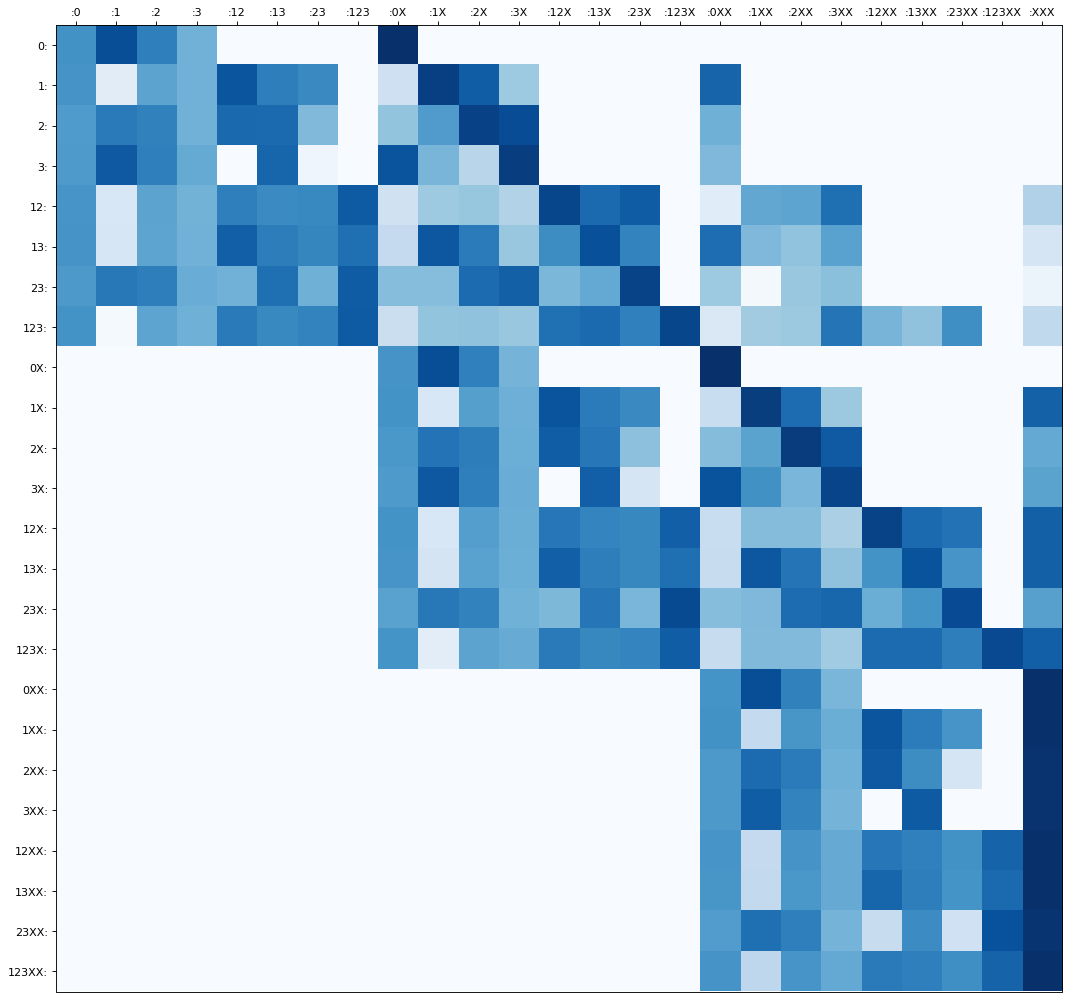

In [155]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(1,1,1)
im = plt.imshow(np.array(df), cmap=plt.get_cmap('Blues_r'))
ax.set_xticks(np.arange(25))
ax.set_yticks(np.arange(24))
ax.set_xticklabels(list_to_states())
ax.set_yticklabels(list_from_states())
ax.xaxis.tick_top()
ax.tick_params(axis='both', which='major', labelsize=10)
cmap0 = plt.get_cmap('Blues_r')
plt.savefig('whole.pdf',format='pdf')
pass

In [142]:
np.array(0.0236367604).round(decimals=3)

0.024

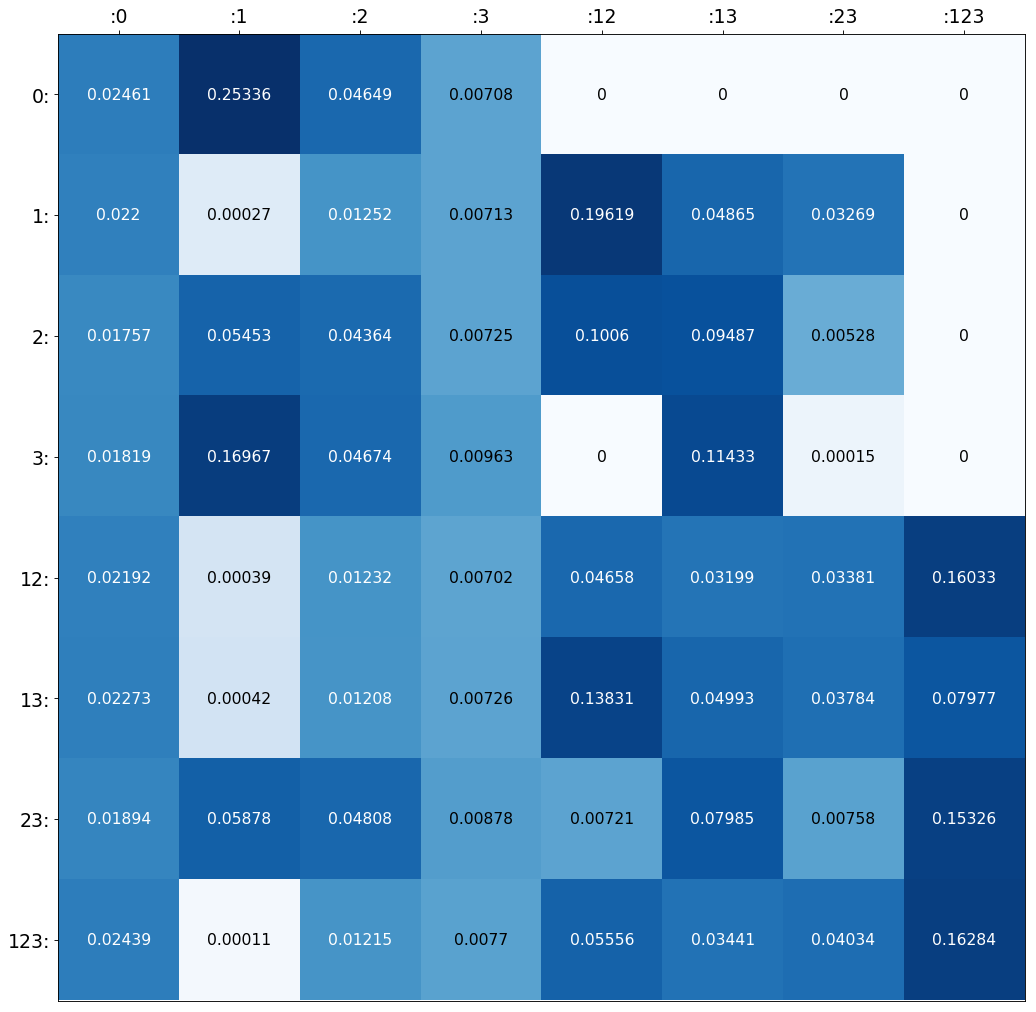

In [150]:
fig1=plt.figure(figsize=(18,16), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(1,1,1)
im = plt.imshow(np.array(detail), cmap=cmap0)
ax.set_xticks(np.arange(8))
ax.set_yticks(np.arange(8))
ax.set_xticklabels(list_to_states()[0:8])
ax.set_yticklabels(list_from_states()[0:8])
ax.tick_params(axis='both', which='major', labelsize=17)
ax.xaxis.tick_top()
for i in range(8):
    for j in range(8):
        text = ax.text(j, i, 0 if 
                       np.array(detail)[i,j] == 4 else 
                       np.array(10**((-np.array(detail))[i,j])).round(decimals=5), 
                       ha="center", va="center", 
                       size=14, color="w" if np.array(detail)[i,j] < 2 else 'k')


In [98]:
re.search('^[0-3X]*:','12XX:XXX').group()

'12XX:'

In [82]:
re.search(':[0-3X]*$','12XX:123XX').group()

':123XX'